### Ejercicios estadística descriptiva

En este caso usaremos el mismo DataFrame que hemos estado usando en los últimos pairs. El ejercicio que os planteamos es:

Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.


In [153]:
#Importo las librerías
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest
 
import warnings
warnings.filterwarnings("ignore")

In [154]:
#Establezco la configuración.
pd.set_option('display.max_columns', None)
#Abro el csv.
df= pd.read_csv('df_continentes_sinnulos.csv', index_col=0)
df.head(3)

,country,density,abbreviation,capitalmajorcity,currencycode,largestcity,officiallanguage,longitude,latitude,continent,urbanpopulation,unemploymentrate,totaltaxrate,population,minimumwage,maternalmortalityratio,gdp,cpichange,cpi,co2emissions,physiciansperthousand,outofpockethealthexpenditure,lifeexpectancy,infantmortality,grosstertiaryeducationenrollment,gasolineprice,fertilityrate,callingcode,birthrate,armedforcessize,landarea,agriculturalland,taxrevenue,populationlaborforceparticipation,forestedarea
0,Afghanistan,60.0,AF,Kabul,AFN,Kabul,Pashto,67.709953,33.939110,Asia,9797273.0,11.12,71.4,38041754.0,0.43,638.0,1.910135e+10,2.3,149.90,8672.0,0.28,78.4,64.5,47.9,9.7,0.70,4.47,93.0,32.49,323000.0,652230.0,58.1,9.3,48.9,2.1
1,Albania,105.0,AL,Tirana,ALL,Tirana,Albanian,20.168331,41.153332,Europa,1747593.0,12.33,36.6,2854191.0,1.12,15.0,1.527808e+10,1.4,119.05,4536.0,1.20,56.9,78.5,7.8,55.0,1.36,1.62,355.0,11.78,9000.0,28748.0,43.1,18.6,55.7,28.1
2,Algeria,18.0,DZ,Algiers,DZD,Algiers,Arabic,1.659626,28.033886,África,31510100.0,11.70,66.1,43053054.0,0.95,112.0,1.699882e+11,2.0,151.36,150006.0,1.72,28.1,76.7,20.1,51.4,0.28,3.02,213.0,24.28,317000.0,2381741.0,17.4,37.2,41.2,0.8


1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

- Media

- Mediana

- Desviación estándar

- Mínimo

- Máximo

In [155]:
#Selecciono las columnas numéricas.
numericas = df.select_dtypes(include=[np.number])
#Calculo las estadísticas descriptivas para las columnas.
estadísticas = numericas.agg(['mean', 'median', 'min', 'max'])
estadísticas

,density,longitude,latitude,urbanpopulation,unemploymentrate,totaltaxrate,population,minimumwage,maternalmortalityratio,gdp,cpichange,cpi,co2emissions,physiciansperthousand,outofpockethealthexpenditure,lifeexpectancy,infantmortality,grosstertiaryeducationenrollment,gasolineprice,fertilityrate,callingcode,birthrate,armedforcessize,landarea,agriculturalland,taxrevenue,populationlaborforceparticipation,forestedarea
mean,357.427835,20.232434,19.092351,2.196484e+07,6.703454,40.618041,3.942581e+07,1.933505,152.798969,4.752073e+11,6.351546,184.759381,172755.5,1.837165,32.682474,72.332474,21.08866,37.674742,1.000258,2.673247,360.634021,20.085464,1.442216e+05,6.902407e+05,39.071649,16.585714,62.766286,31.888235
median,88.000000,20.972652,17.273849,4.694702e+06,5.360000,37.200000,8.877067e+06,1.045000,53.000000,3.626626e+10,2.300000,125.080000,12633.0,1.510000,30.900000,73.300000,13.95000,31.250000,0.980000,2.240000,256.000000,17.915000,3.100000e+04,1.205380e+05,39.500000,16.585714,62.766286,31.888235
min,2.000000,-175.198242,-40.900557,5.464000e+03,0.090000,8.000000,8.360000e+02,0.010000,2.000000,4.727146e+07,-4.300000,99.030000,11.0,0.010000,0.200000,52.800000,1.40000,0.800000,0.000000,0.980000,1.000000,5.900000,0.000000e+00,0.000000e+00,0.600000,0.000000,38.000000,0.000000
max,26337.000000,178.065032,64.963051,8.429340e+08,28.180000,219.600000,1.397715e+09,13.590000,1150.000000,2.142770e+13,254.900000,4583.710000,9893038.0,8.420000,81.600000,85.400000,84.50000,136.600000,2.000000,6.910000,1876.000000,46.080000,3.031000e+06,1.709824e+07,82.600000,37.200000,86.800000,98.300000


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [156]:
#Obtengo la densidad máxima por país.
pais_mayor_densidad = df.groupby('country')['density'].max()

#Ordenos las densidades máximas de forma descendente.
pais_mayor_densidad_ordenado = pais_mayor_densidad.sort_values(ascending=False)

#Obtengo la densidad mínima por país.
pais_menor_densidad = df.groupby('country')['density'].min()

#Ordenos las densidades mñinimas de forma descendente.
pais_menor_densidad_ordenado = pais_mayor_densidad.sort_values(ascending=True)

print("El país con mayor densidad de población es:")
print(pais_mayor_densidad_ordenado.head(1))
print('...................................')
print("El país con menor densidad de población es:")
print(pais_menor_densidad_ordenado.head(1))

El país con mayor densidad de población es:
country
Monaco    26337.0
Name: density, dtype: float64
...................................
El país con menor densidad de población es:
country
Mongolia    2.0
Name: density, dtype: float64


In [157]:
#Otra manera de obtener la densidad máxima y mínima.
#Podemos utilizar funciones básicas de filtrado y ordenación: primero, ordenamos por densidad ("density") de población en orden descendente
df_densidad_ordenada = df.sort_values(by='density', ascending=False)

#Selecciono el primer registro para obtener el país con la mayor densidad de población.
pais_mayor_densidad = df_densidad_ordenada.iloc[0]['country']
print(f'El país con la mayor densidad de población es: {pais_mayor_densidad}')

#Hago lo mismo para buscar el país con la menor densidad de población.
df_densidad_ordenada = df.sort_values(by='density', ascending=True)

pais_menor_densidad = df_densidad_ordenada.iloc[0]['country']
pais_menor_densidad
print(f'El país con la mayor densidad de población es: {pais_menor_densidad}')


El país con la mayor densidad de población es: Monaco
El país con la mayor densidad de población es: Mongolia


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [158]:
#Calculo el promedio de natalidad.
promedio_natalidad = df.groupby('country')['birthrate'].mean()
promedio_natalidad


country
Afghanistan    32.49
Albania        11.78
Algeria        24.28
Andorra         7.20
Angola         40.73
               ...  
Venezuela      17.88
Vietnam        16.75
Yemen          30.45
Zambia         36.19
Zimbabwe       30.68
Name: birthrate, Length: 194, dtype: float64

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [159]:
#Creo tre listas para agrupar los países.
alta=[]
moderada=[]
baja=[]

#Calculo los percentiles 25, 50 y 75 de los índices de mortalidad. 
percentiles = np.percentile(df["infantmortality"], [25, 50, 75])

#Creo una función para clasificar los paises en función de la mortalidad.
def clasificar_mortalidad(mortalidad):
    if mortalidad <= percentiles[0]:
        return "Baja"
    elif mortalidad <= percentiles[1]:
        return "Moderada"
    else:
        return "Alta"

#Aplico la función a cada fila y creo una nueva columna 'clasificación'.
df['infantmortality_rate'] = df['infantmortality'].apply(clasificar_mortalidad)

#Muestro la nueva columna junto a la columna de país para ver mejor la clasificación.
df[['country','infantmortality_rate']]


,country,infantmortality_rate
0,Afghanistan,Alta
1,Albania,Moderada
2,Algeria,Alta
3,Andorra,Baja
4,Angola,Alta
...,...,...
189,Venezuela,Alta
190,Vietnam,Alta
191,Yemen,Alta
192,Zambia,Alta


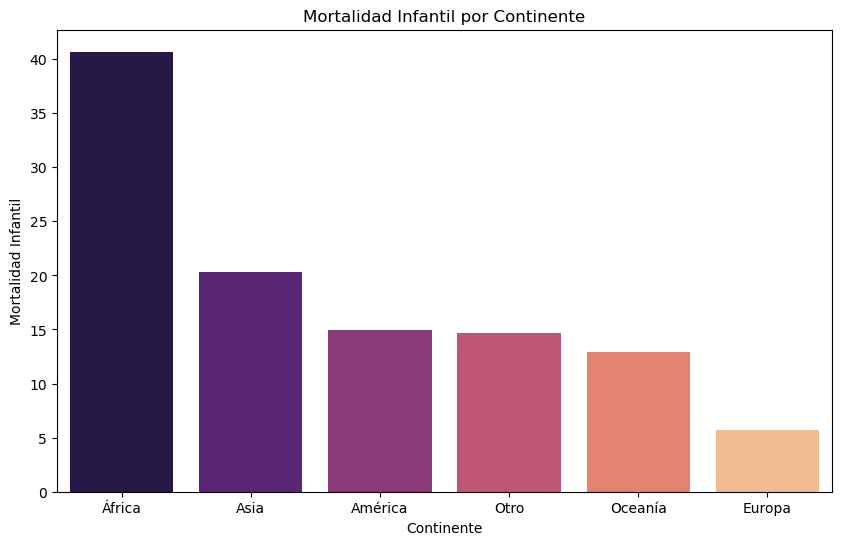

In [160]:
#Ordeno los continentes calculando la mediana.
continent_order = df.groupby('continent')['infantmortality'].mean().sort_values(ascending=False).index

#Visualizo los datos pero en lugar de por país por continente
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='infantmortality', data=df, estimator=np.mean, ci=None, palette='magma', order=continent_order)

#Creo el título y las etiquetas de los ejes
plt.title('Mortalidad Infantil por Continente')
plt.xlabel('Continente')
plt.ylabel('Mortalidad Infantil');

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación.

In [161]:
#Creo la tabla de correlación.
correlacion = df['fertilityrate'].corr(df['lifeexpectancy'])
correlacion

-0.848561363659119

In [162]:
#Otra forma de mostrar los datos directamente en un DF.
df[["fertilityrate", "lifeexpectancy"]].corr()

,fertilityrate,lifeexpectancy
fertilityrate,1.000000,-0.848561
lifeexpectancy,-0.848561,1.000000


**Observaciones:** La correlación entre ambas vairables es alta (supera el 0.7), indicando que la tasa de natalidad está directamente relacionada con la esperanza de vida y viceversa, ya que pueden influenciarse mutuamente.

**Bonus:**

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

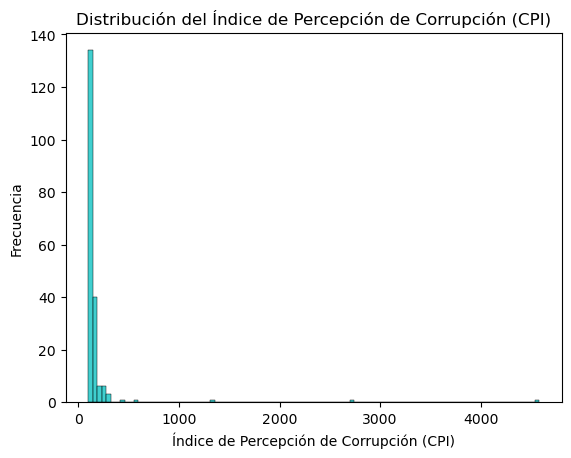

In [163]:
sns.histplot(x='cpi', data=df, color= 'c', bins= 100)

# Ajusto el título y las etiquetas de los ejes
plt.title('Distribución del Índice de Percepción de Corrupción (CPI)')
plt.xlabel('Índice de Percepción de Corrupción (CPI)')
plt.ylabel('Frecuencia');

**Observaciones:** La gráfica está totalmente sesgada a la izquierda lo que indica que la mayoría de países tienen una percepción de la corrupción más bien baja.

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

8. Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

In [164]:
#Calculo el porcentaje promedio.
porcentaje_promedio = df.groupby('country')['populationlaborforceparticipation'].mean() * 100
df_porcentaje = porcentaje_promedio.reset_index()
df_porcentaje

,country,populationlaborforceparticipation
0,Afghanistan,4890.000000
1,Albania,5570.000000
2,Algeria,4120.000000
3,Andorra,6276.628571
4,Angola,7750.000000
...,...,...
189,Venezuela,5970.000000
190,Vietnam,7740.000000
191,Yemen,3800.000000
192,Zambia,7460.000000


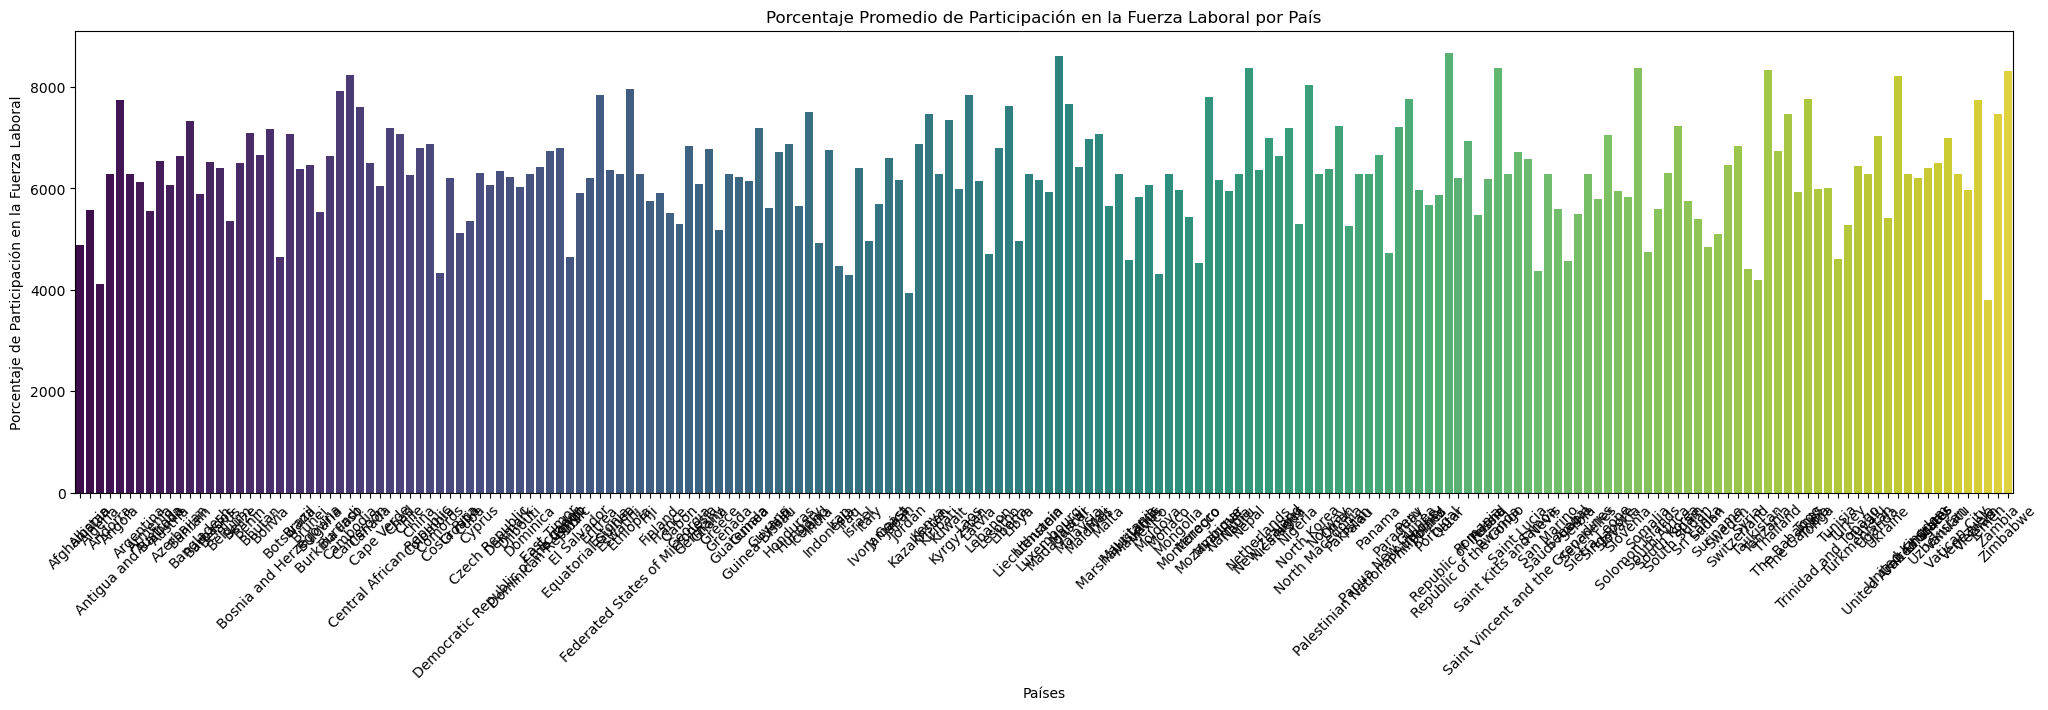

In [165]:
#Visualizo los resultados del DF con un gráfico de barras.
plt.figure(figsize=(25, 6))
sns.barplot(x='country', y='populationlaborforceparticipation', data=df_porcentaje, palette='viridis')

#Ajusto el título y las etiquetas de los ejes.
plt.title('Porcentaje Promedio de Participación en la Fuerza Laboral por País')
plt.xlabel('Países')
plt.ylabel('Porcentaje de Participación en la Fuerza Laboral')

#Roto las eiquetas del eje x para mejorar la legibilidad.
plt.xticks(rotation=45);


9. Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

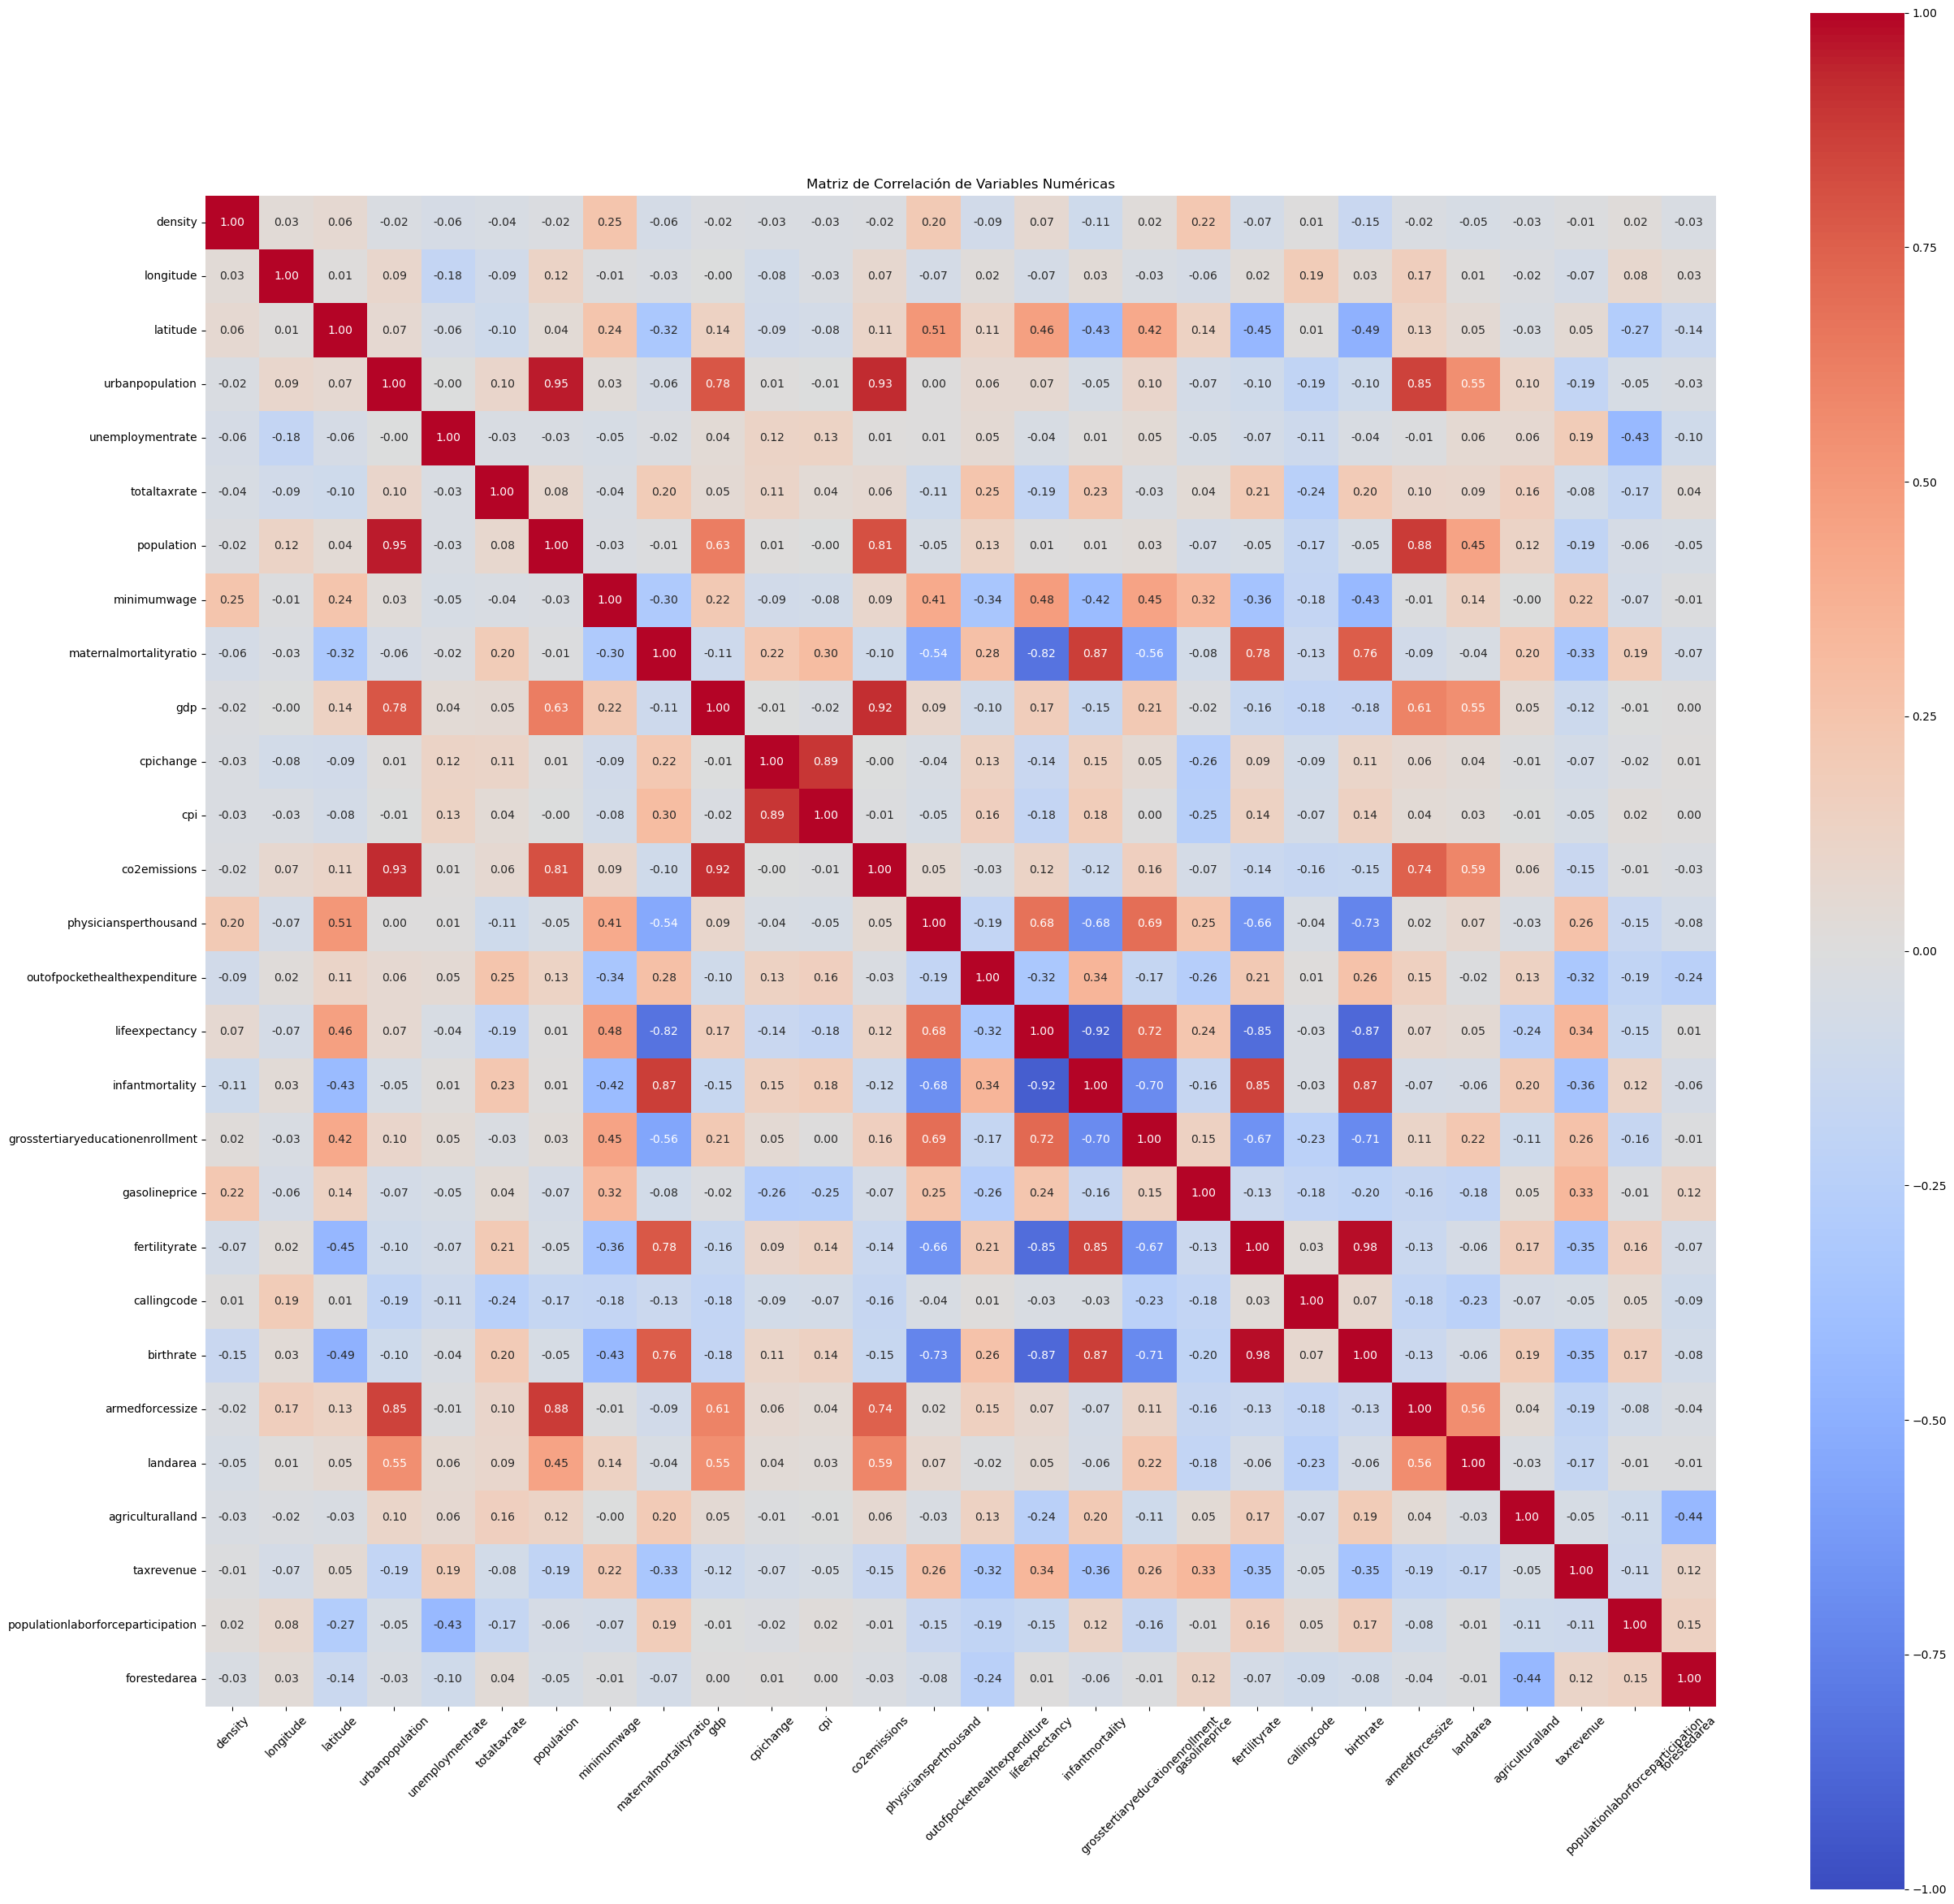

In [166]:
df_numericas = df.select_dtypes(include=['int64', 'float64'])
df_numericas

#Calculo la matriz de correlación.
corr_matrix = df_numericas.corr()

#Creo el mapa de calor.
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, square=True)

#Ajusto titulo y ejes etiquetas.
plt.title('Matriz de Correlación de Variables Numéricas')
plt.xticks(rotation=45);

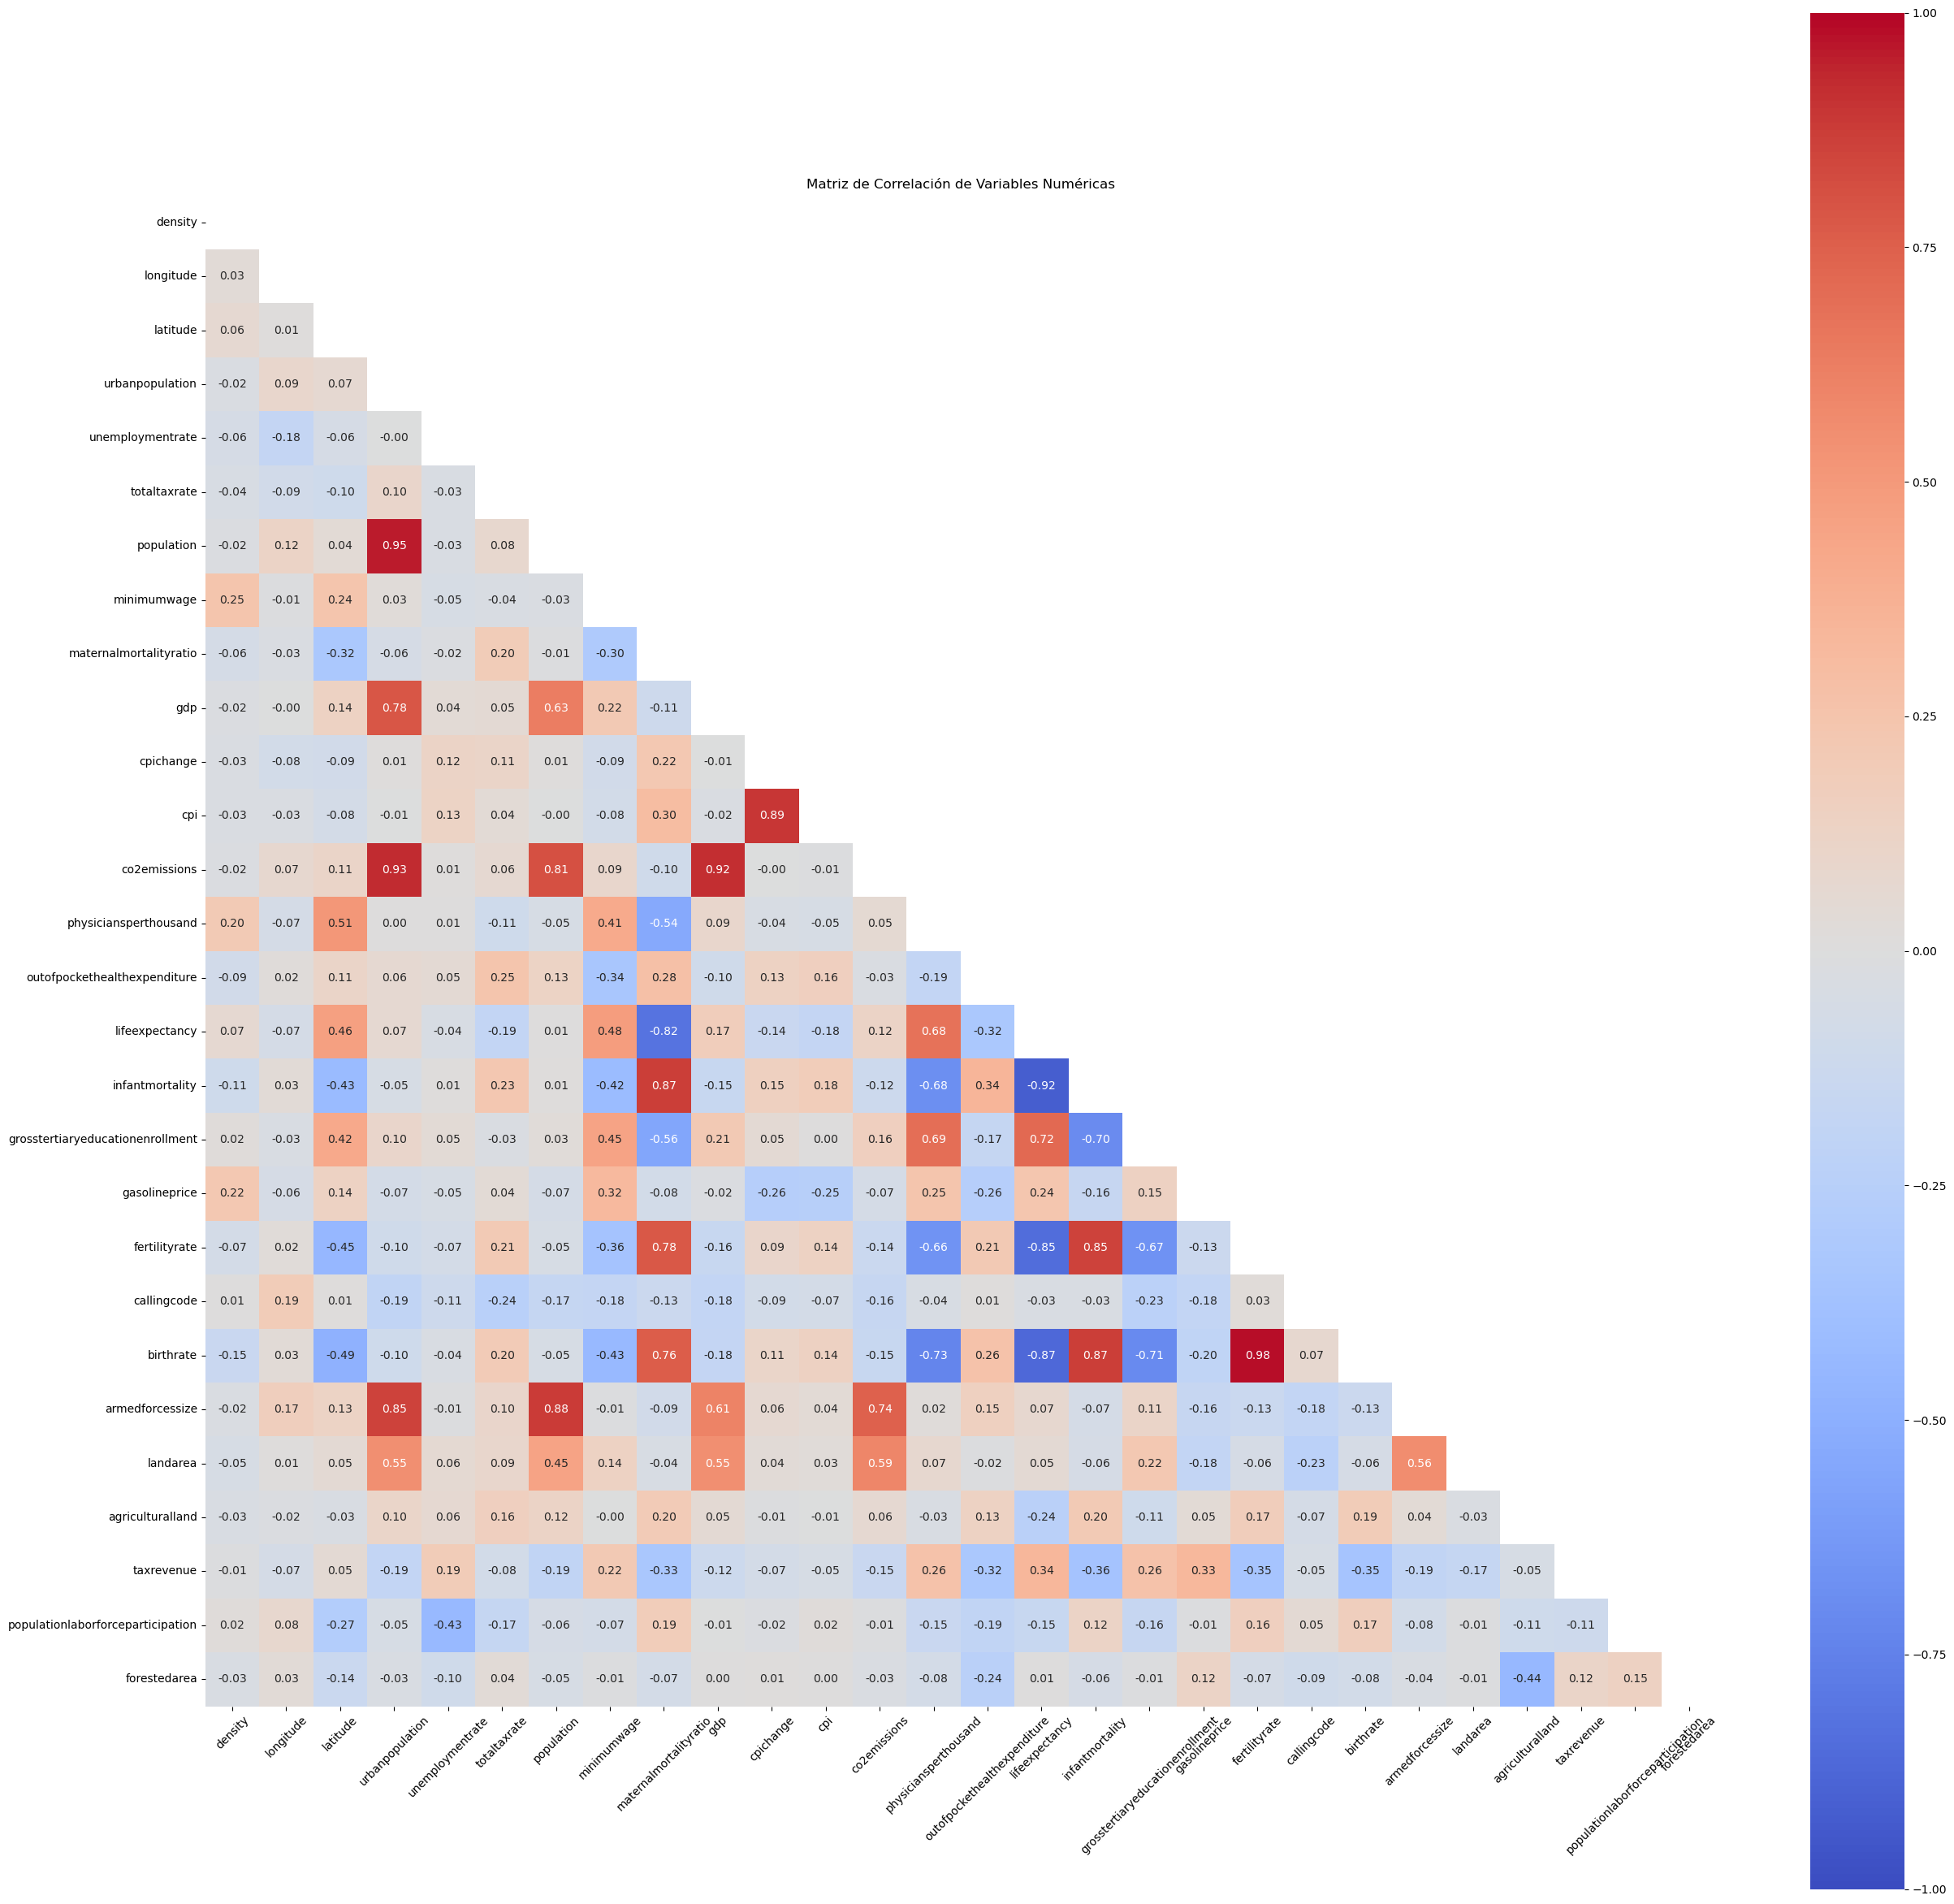

In [167]:
#Creo una matriz booleana para visualizar mejor los datos. 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Creo el mapa de calor con la máscara aplicada.
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, square=True, mask=mask)

#Ajusto el título y las etiquetas de los ejes.
plt.title('Matriz de Correlación de Variables Numéricas')
plt.xticks(rotation=45)
plt.yticks(rotation=0);